# Ex: 6.3: Introduction to Scikit-learn

- Objective: Begin to explore some of what scikit-learn has to offer, by importing and examining the package. Build a classifier to learn and reliably identify a new handwritten digit that it has not been trained on.

- **Requires data files: `digits` dataset from scikit-learn**

- **Demonstrates**:
    - How to import built-in datasets from scikit-learn.
    - Working with the `sklearn.utils.Bunch` object.
    - Training a classifier on lableled data using the `sklearn.svm.SVC` class.
    - Using the `fit method` of a classifier to train it on labeled data.
    - Using the `predict method` of a classifier to make predictions on unlabeled data.

---

In [1]:
# Install scikit-learn
%pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.6 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.7 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.8 MB/s eta 0:00:03
   --------------------- ------------------ 6.0/11.1 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 2.9 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.0 MB/s eta 0:00:02
   ---------

### Step 1.

In the code cell below, begin by importing `sklearn`.

In practice, because the `sklearn` package is large and contains many more components than one needs for any particular analysis, the entire package is typically not imported as we have done here. Instead, particular submodules, or functions within those submodules, usually get imported for use within Python, as we will see below. 

In [2]:
import sklearn

### Step 2.

The Course Notebook introduced the machine learning problem of recognizing hand-written digits.  This is a classic problem that is often used in exercises and documentation, as well as by algorithm developers to benchmark their new algorithms alongside existing ones.

The `sklearn` package includes several built-in datasets that can be imported.  One of these is a collection of low-resolution images (8 x 8 pixels) representing hand-written digits.  Let's import the dataset:

* First import the `datasets` submodule from the sklearn package (```from sklearn import datasets```)
* Next call the ```load_digits()``` function in the `datasets` module, and assign the result to the variable ```digits```.
* Using the built-in function <code>type</code>, print the type of the ```digits``` variable.

In [3]:
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Print the type of the digits variable
digits_type = type(digits)
digits_type

sklearn.utils._bunch.Bunch

### Step 3.

```digits``` is an object of type 'sklearn.utils.Bunch'. This is basically a new type of container that is something like a Python dictionary.  (One of the ways it differs from a dictionary is that elements contained in the Bunch can be accessed using the dot operator ```.``` rather than the square-bracket indexing supported by dictionaries.)

Because a Bunch is similar to a dictionary, it can be queried to list its keys.  Print out the result of ```digits.keys()``` and examine the output.

In [4]:
# Print the keys of the digits variable
digits_keys = digits.keys()
digits_keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Step 4.

You should notice that ```digits``` contains multiple elements, one of which is ```images```, which we can access via the expression ```digits.images```, that is, using the dot operator to get the images out of the digits Bunch.  In the code cell below, print the types of the items ```images``` and ```target``` contained in ```digits```.

In [ ]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Step 5.

You should see that both ```images``` and ```target``` are numpy arrays.  Since they are arrays, we can print their shape.  In the code cell below, print out the shape of both the ```images``` and ```target``` arrays.

In [6]:
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


### Step 6.

You should notice that ```images``` is a three-dimensional array of shape (1797, 8, 8) and that ```target``` is a one-dimensional array of shape (1797,).  Each array contains 1797 elements in it, since these are 1797 examples of hand-written digits in this dataset.

In the code cell below:
* print the value of the first image in the array (```digits.images[0]```)
* print the value of the first target

In [7]:
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


### Step 7.

Because the images array has shape (1797, 8, 8), the first entry in that array (```digits.images[0]```) is an 8 x 8 subarray.  This array encodes the grayscale value of the first hand-written image in the dataset, i.e., each entry in the 8 x 8 array encodes the intensity (darkness) of the corresponding pixel.  

From the output above, the value of ```digits.target[0]``` is reported to be ```0```.  This means that the first image in the dataset is an example of the digit 0.

Execute the code cell below, which uses the seaborn heatmap function to display the image.  Hopefully that looks something like a zero to you.

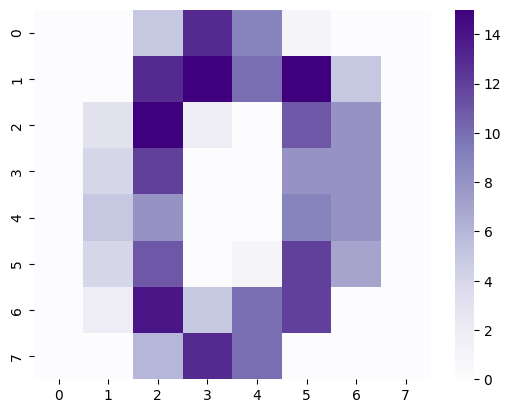

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(digits.images[0], cmap=plt.cm.Purples);

### Step 8.

The ```images``` and ```target``` entries are in registry with each other, e.g., ```target[0]``` indicates the true value of the data encoded in ```images[0]```. ```target[1]``` indicates the true value of the data encoded in ```images[1]```, etc.  There are 10 possible digits (0-9), but there are 1797 images of handwritten digits, so there are many different examples of each digit in the dataset. 

In the code cell below, use the ```sns.heatmap``` function to display the following:
* print the value of target number 365
* plot a heatmap of image number 365

5


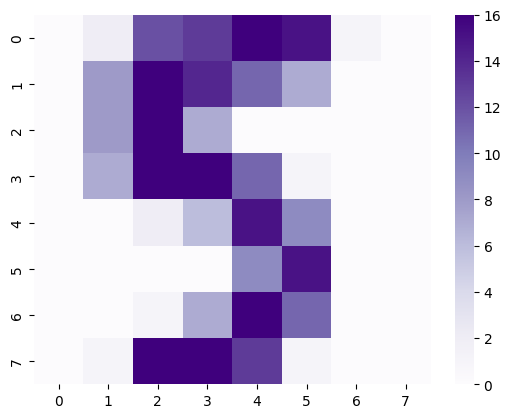

In [12]:
print(digits.target[365])
sns.heatmap(digits.images[365], cmap=plt.cm.Purples);

### Step 9.

The ```digits``` Bunch also contains an item called ```data```, which is also a numpy array.  In the code cell below, print out the shape of the data item.

In [11]:
print(digits.data.shape)

(1797, 64)


### Step 10.

Notice ```digits.data``` has shape (1797, 64).  This reflects the fact that for each of the 1797 hand-written images in the dataset, the 8 x 8 image array has been "flattened" into a one-dimensional data array of length 64, by concatenating each of the 8 rows one after the other.  (Within numpy, an n-dimensional array can be flattened into a one-dimensional array using the function <code>np.ravel</code>.)  

A flattening like this is convenient to be able to feed data into a machine learning algorithm, since we can use the same algorithm for datasets of different dimensions.  

No information is lost by this flattening procedure, except we can't recognize what digit is encoded. 

Run the code cell below to make a simple line plot using ```plt.plot``` of the one-dimensional data in array <code>digits.data[0]</code> to see what the flattened version of the data looks like. 

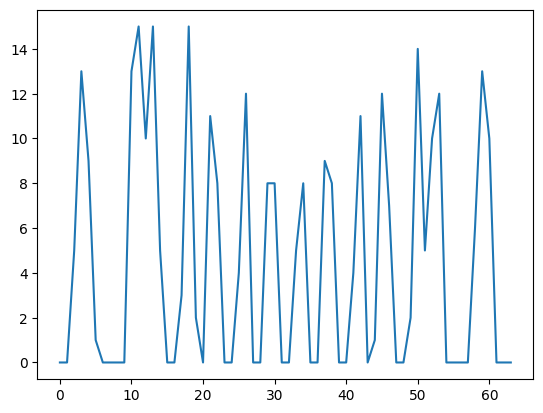

In [10]:
plt.plot(digits.data[0])

### Step 11.

Next, carry out a supervised learning classification of the data.

In this classification process, we train a classifier on labeled examples, where the labels are the known values in the target array.  For example, the classifier will be instructed that the data in ```digits.data[0]``` corresponds to the digit 0, the data in ```digits.data[365]``` corresponds to the digit 5, etc.

Execute the code cell below and note:
* The first line imports the `svm` classifier from `sklearn`
* The second line: 
    - Calls the Classification Model. 
    - Gamma relates to how tightly the model fits the data. A high gamma zooms in and reacts strongly to every training point, while a low gamma zooms out and sees the overall pattern.
    - C is a regularization parameter. `High C` = high cost = model avoids mistakes at all costs (can overfit). `Low C` = low cost = model tolerates some mistakes (better generalization).
* The third line fits (trains) the data in all of the images and targets except for the last (```digits.data[:-1]```, which stops one item short of the last entry)


In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

### Step 12.

Having fit the classifier on all but the last image, we can now try to predict the digit associated with the last image, by calling the ```predict``` method on our classifier ```clf```.  Execute the code cell below and examine the output.

In [13]:
clf.predict(digits.data[-1:])

array([8])

### Step 13.

This tells us that our classifier has predicted the last digit to be 8, based on everything it learned in training on the previous 1796 images.

In the code cell below, make a heatmap plot of the last image in the dataset.  Does it look like the number 8?

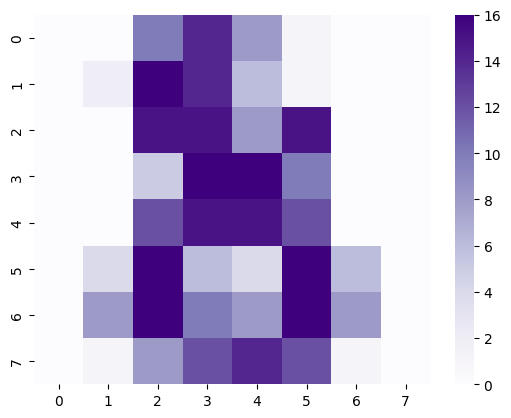

In [15]:
sns.heatmap(digits.images[-1], cmap=plt.cm.Purples);

### Step 14.

The last digit in the dataset was *predicted* to be 8, based on the trained classifier. In the code cell below, write an expression that assigns to the variable <code>true_last_digit</code> the true value of the last digit in the dataset, by extracting the relevant value out of the <code>digits</code> object.

In [18]:
true_last_digit = digits.target[-1]
true_last_digit

np.int64(8)

### Step 15.

To recap, in the example above, we trained the classifier using all but one example, and then tried to predict the digit for that last remaining example. In turn, we could instead train on all but the last 100 examples, and then predict the last 100 examples using that model.  

In the code cell below, copy the ```fit``` and ```predict``` functions found in Step 11 and Step 12 above, and modify them in order to fit the ```clf``` classifier on all but the last 100 examples, and then predict the digits for the last 100 examples. Save your result to the variable `predict_last_100`, and print out the value of that variable so that you can observe the set of predictions made for this test dataset.

In [19]:
clf.fit(digits.data[:-100], digits.target[:-100])
predict_last_100 = clf.predict(digits.data[-100:])
predict_last_100

array([0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2,
       7, 8, 2, 0, 1, 2, 6, 3, 8, 7, 5, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9,
       5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6,
       8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5,
       7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

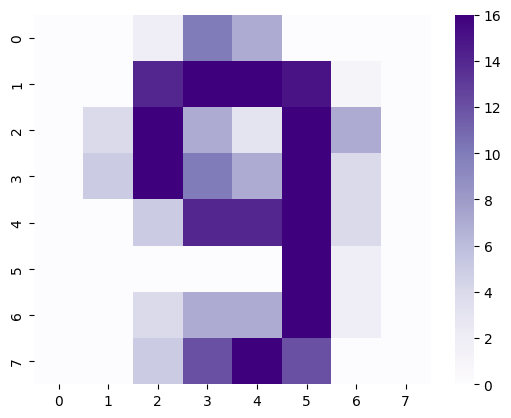

In [20]:
sns.heatmap(digits.images[-2], cmap=plt.cm.Purples);